# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
print(merged_data)


     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [12]:
# Checking the number of mice.
number_of_mice = merged_data["Mouse ID"].unique()
print(f'Number of unique mice: {len(number_of_mice)}')

Number of unique mice: 249


In [45]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_ids = duplicates['Mouse ID'].unique()
print(duplicate_ids)
print(duplicate_ids.dtype)

['g989']
object


In [20]:
# Optional: Get all the data for the duplicate mouse ID.
print(duplicates)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [55]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data[~merged_data['Mouse ID'].isin(duplicate_ids)]
print(cleaned_data)


     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [53]:
# Checking the number of mice in the clean DataFrame.
print(len(cleaned_data['Mouse ID'].unique()))

248


## Summary Statistics

In [71]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
grouped_data = cleaned_data.groupby('Drug Regimen')
grouped_data.describe()




Age_months                                                     \
                  count       mean       std  min    25%   50%   75%   max   
Drug Regimen                                                                 
Capomulin         230.0  13.456522  7.721423  1.0   7.00  16.5  20.0  24.0   
Ceftamin          178.0  13.247191  8.071406  2.0   6.00  12.0  20.0  24.0   
Infubinol         178.0  16.230337  7.510278  1.0   8.00  20.0  23.0  24.0   
Ketapril          188.0  15.659574  6.019670  1.0  11.75  18.0  19.0  24.0   
Naftisol          186.0  12.000000  6.715855  2.0   8.00   9.0  19.0  23.0   
Placebo           181.0  10.734807  6.354907  1.0   5.00  10.0  17.0  21.0   
Propriva          148.0  10.006757  6.946341  1.0   5.00   7.5  16.0  24.0   
Ramicane          228.0  10.684211  5.946629  1.0   7.00   9.0  18.0  23.0   
Stelasyn          181.0  12.784530  7.939562  1.0   4.00  14.0  21.0  23.0   
Zoniferol         182.0  12.598901  5.786114  2.0   8.00  12.5  16.0  24.0   

             Weight (g)             ... Tumor Volume (mm3)             \
                  count       mean  ...                75%        max   
Drug Regimen                        ...                                 
Capomulin         230.0  19.965217  ...          45.000000  48.158209   
Ceftamin          178.0  27.398876  ...          56.801438  68.923185   
Infubinol         178.0  27.196629  ...          57.314444  72.226731   
Ketapril          188.0  27.861702  ...          60.870951  78.567014   
Naftisol          186.0  27.166667  ...          59.963034  76.668817   
Placebo           181.0  27.928177  ...          59.916934  73.212939   
Propriva          148.0  27.135135  ...          56.491585  72.455421   
Ramicane          228.0  19.679825  ...          45.000000  47.622816   
Stelasyn          181.0  27.856354  ...          58.719297  75.123690   
Zoniferol         182.0  27.692308  ...          57.954259  73.324432   

             Metastatic Sites                                               
                        count      mean       std  min  25%  50%  75%  max  
Drug Regimen                                                                
Capomulin               230.0  0.713043  0.848993  0.0  0.0  0.0  1.0  3.0  
Ceftamin                178.0  1.179775  1.184283  0.0  0.0  1.0  2.0  4.0  
Infubinol               178.0  0.960674  1.027104  0.0  0.0  1.0  2.0  4.0  
Ketapril                188.0  1.297872  1.393873  0.0  0.0  1.0  2.0  4.0  
Naftisol                186.0  1.182796  1.216519  0.0  0.0  1.0  2.0  4.0  
Placebo                 181.0  1.441989  1.338824  0.0  0.0  1.0  2.0  4.0  
Propriva                148.0  1.013514  1.106484  0.0  0.0  1.0  1.0  4.0  
Ramicane                228.0  0.548246  0.691259  0.0  0.0  0.0  1.0  3.0  
Stelasyn                181.0  0.872928  0.972046  0.0  0.0  1.0  1.0  4.0  
Zoniferol               182.0  1.230769  1.248884  0.0  0.0  1.0  2.0  4.0  

[10 rows x 40 columns]

In [69]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Standard_Deviation='std',
    SEM='sem'
)
print(summary_stats)


                   Mean     Median   Variance  Standard_Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

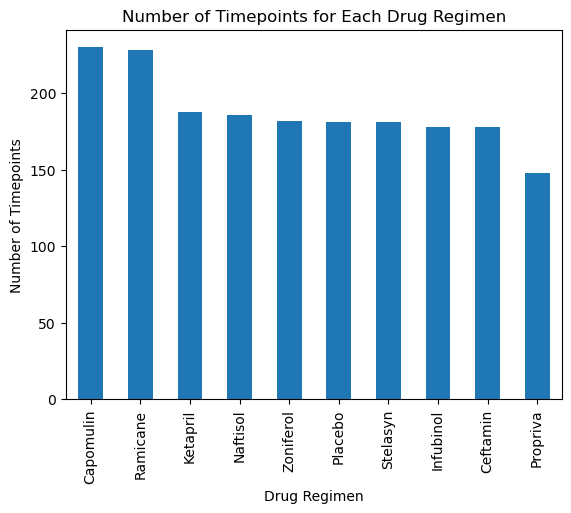

In [73]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint_counts = cleaned_data['Drug Regimen'].value_counts()
timepoint_counts.plot(kind='bar', title='Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.show()


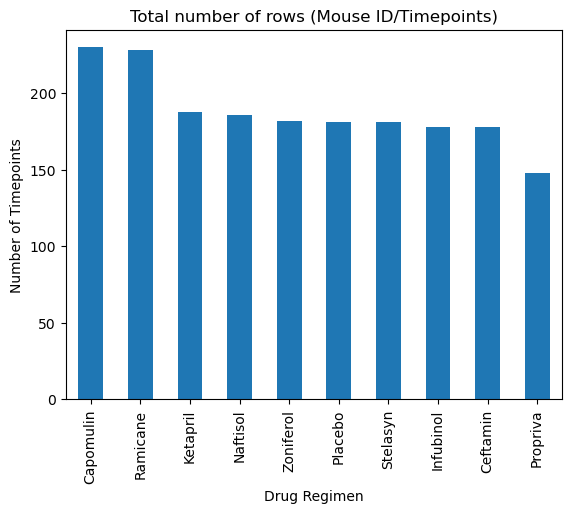

In [75]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoint_counts = cleaned_data['Drug Regimen'].value_counts()
timepoint_counts.plot(kind='bar', title='Total number of rows (Mouse ID/Timepoints)')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.show()


In [35]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart


In [36]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart


## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [38]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


In [39]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [40]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [41]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [42]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
